In [1]:
import rasterio as rio
from rasterio.plot import show
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm

from ipyleaflet import Map, Marker

In [19]:
data = rio.open('../R/test_dataset.tif')

In [20]:
data.read().shape

(4, 1504, 1444)

In [21]:
data.meta

{'driver': 'GTiff',
 'dtype': 'float32',
 'nodata': None,
 'width': 1444,
 'height': 1504,
 'count': 4,
 'crs': CRS.from_epsg(4326),
 'transform': Affine(0.01, 0.0, -2.9407999999999994,
        0.0, -0.01, 58.94833862304688)}

In [22]:
img = data.read(1)
img[img==0] = np.nan

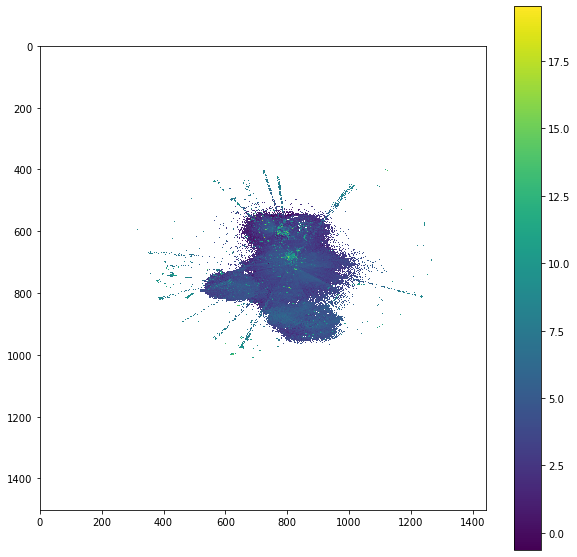

In [23]:
f, ax = plt.subplots(figsize=(10,10))
m = ax.imshow(np.log(img), interpolation='none')#, transform=data.transform)
plt.colorbar(m);

In [15]:
from ipyleaflet import Map, basemaps, basemap_to_tiles

m = Map(
    layers=(basemap_to_tiles(basemaps.NASAGIBS.ModisTerraTrueColorCR, "2017-04-08"), ),
    center=(52.204793, 360.121558),
    zoom=4
)

m

Map(center=[52.204793, 360.121558], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title'…

In [16]:
display(m)

Map(center=[52.204793, 360.121558], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title'…

In [37]:
@widgets.interact(
    t=(1, data.read().shape[0]))
def plot(t=1):
    img = data.read(t)
    img[img==0] = np.nan    

    fig, ax = plt.subplots(figsize=(10,10))
    m = ax.imshow(np.log(img), interpolation='none')
    plt.colorbar(m)

interactive(children=(IntSlider(value=1, description='t', max=4, min=1), Output()), _dom_classes=('widget-inte…